In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from scipy.stats import ttest_ind

In [2]:
# Load data
df = pd.read_csv("Data_Cortex_Nuclear.csv")

**Data Preprocessing**

In [3]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64


In [4]:
# KNN Imputation for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
imputer = KNNImputer(n_neighbors=5)
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [5]:
# Normalization/Scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [6]:
# Encoding Categorical Variables
categorical_columns = ['Genotype', 'Treatment', 'Behavior']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

**Exploratory Data Analysis**

In [7]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
           DYRK1A_N       ITSN1_N        BDNF_N         NR1_N        NR2A_N  \
count  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03   
mean   9.210739e-17  2.631640e-16  4.671161e-16  2.631640e-17 -7.368591e-16   
std    1.000463e+00  1.000463e+00  1.000463e+00  1.000463e+00  1.000463e+00   
min   -1.126620e+00 -1.480049e+00 -4.136549e+00 -2.785688e+00 -2.258111e+00   
25%   -5.527631e-01 -5.710762e-01 -6.376348e-01 -6.853525e-01 -7.365865e-01   
50%   -2.378760e-01 -2.020250e-01 -4.965920e-02 -3.346826e-03 -1.107418e-01   
75%    2.483886e-01  3.200654e-01  5.874772e-01  6.668118e-01  6.255155e-01   
max    8.399245e+00  7.905093e+00  3.612723e+00  4.212754e+00  4.978955e+00   

             pAKT_N       pBRAF_N     pCAMKII_N       pCREB_N        pELK_N  \
count  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03   
mean   9.276530e-16  1.940834e-16  1.315820e-17 -1.842148e-16  3.947460e-17   
std    1.000463e+00  1.000463e

In [8]:
# Visualizations
num_proteins = len(numerical_columns)
num_cols = 4
num_rows = (num_proteins + num_cols - 1) // num_cols



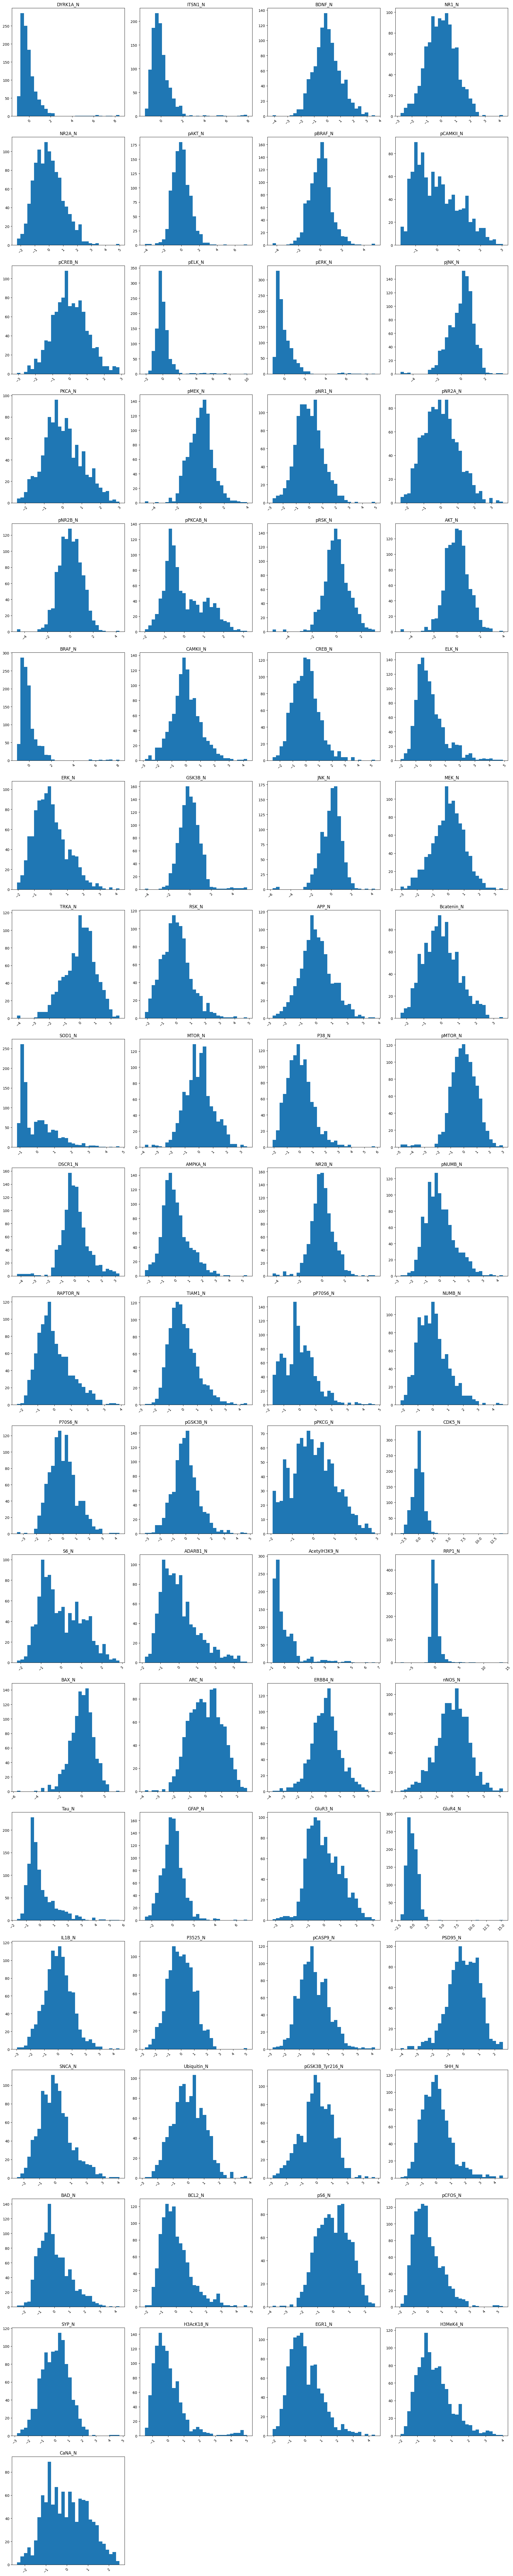

In [9]:

plt.figure(figsize=(20, 5 * num_rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(df[column], bins=30)
    plt.title(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()
plt.close()

In [10]:
print(df.columns)
print(df.head())

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')
  MouseID 

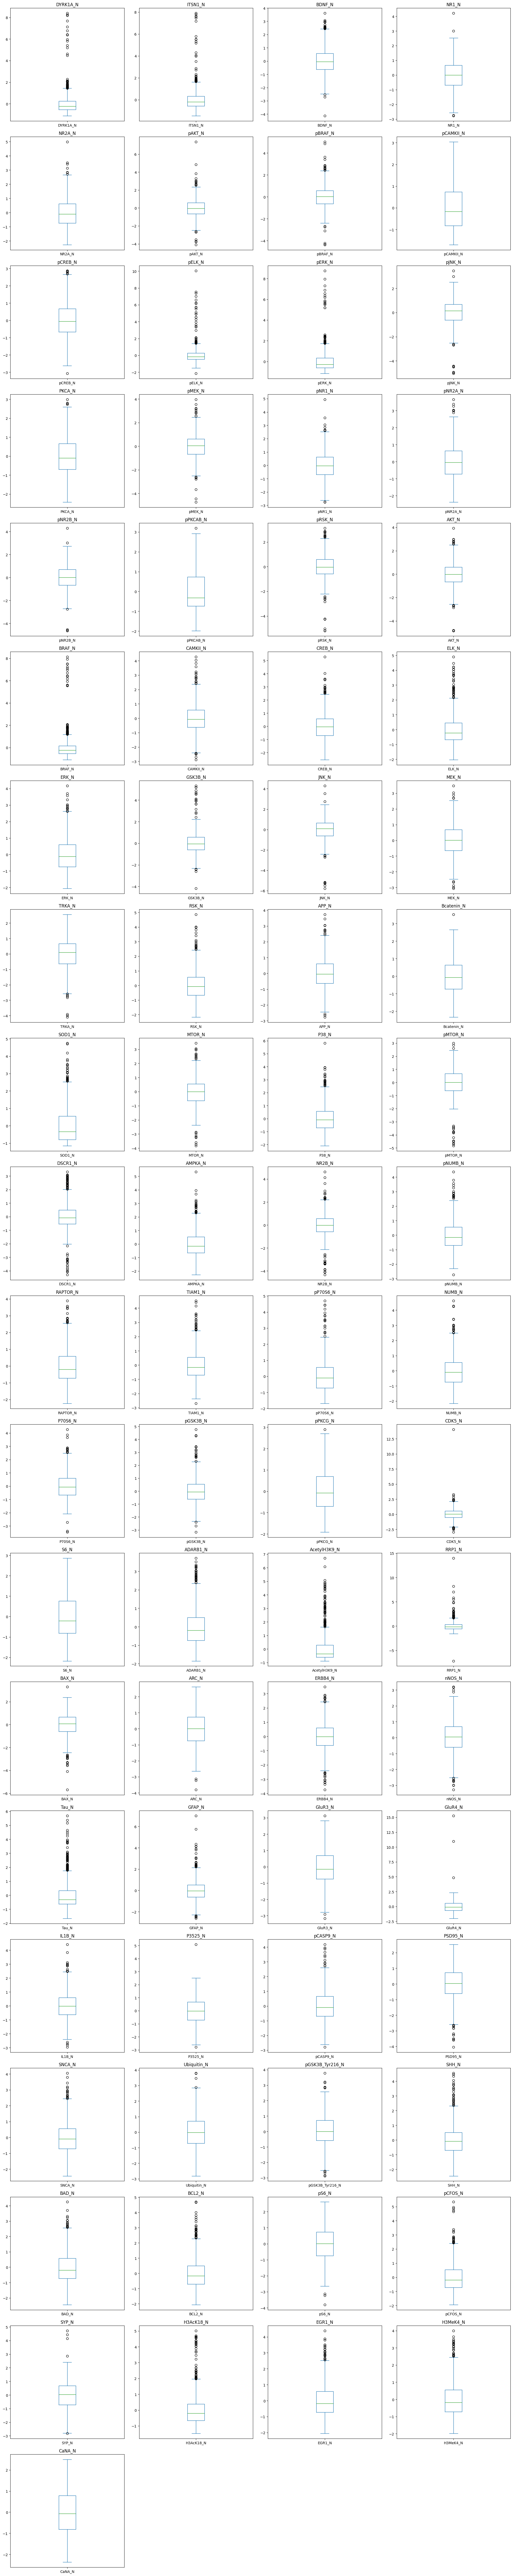

In [11]:
plt.figure(figsize=(20, 5 * num_rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    df[column].plot(kind='box')
    plt.title(column)
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()
plt.close()

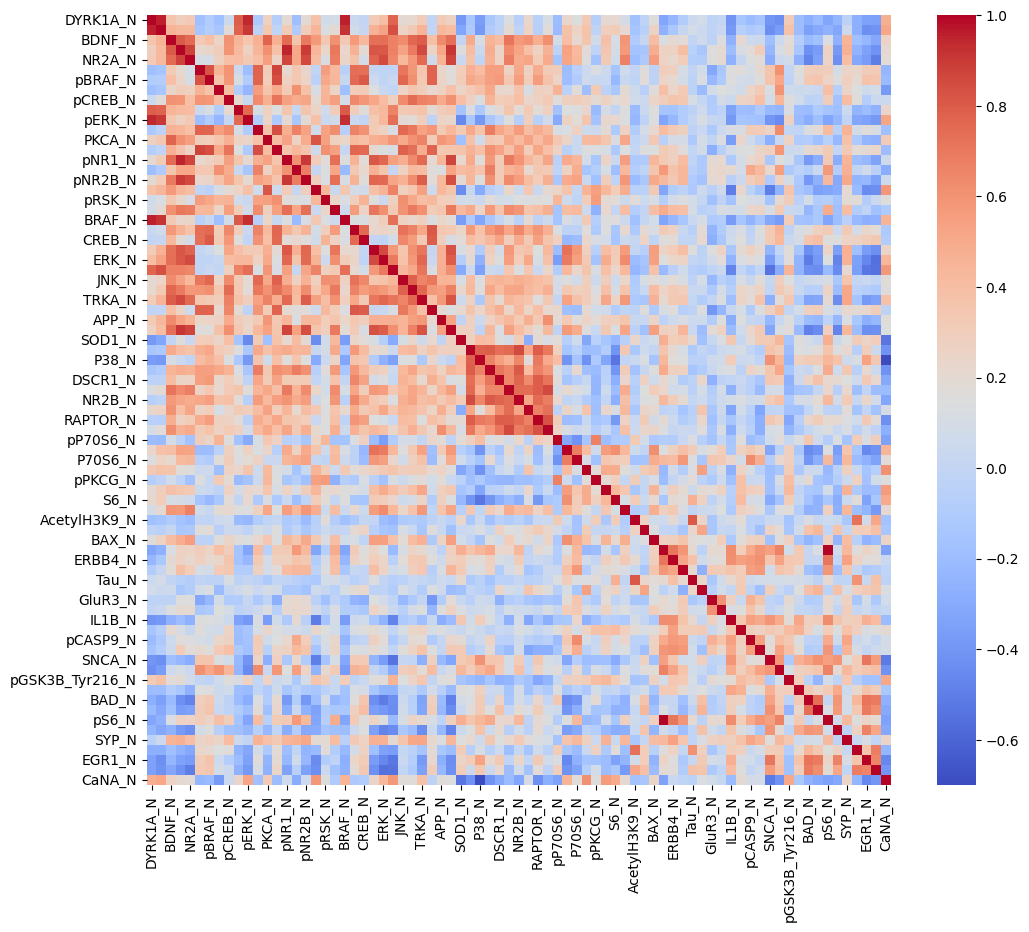

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.savefig('correlation_heatmap.png')
plt.show()
plt.close()


**Feature Selection**

In [13]:
# Correlation Analysis
correlation_matrix = df[numerical_columns].corr()
high_corr_features = np.where(np.abs(correlation_matrix) > 0.8)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                      for x, y in zip(*high_corr_features) if x != y and x < y]
print("Highly correlated features:", high_corr_features)


Highly correlated features: [('DYRK1A_N', 'ITSN1_N'), ('DYRK1A_N', 'pERK_N'), ('DYRK1A_N', 'BRAF_N'), ('ITSN1_N', 'pERK_N'), ('ITSN1_N', 'BRAF_N'), ('ITSN1_N', 'GSK3B_N'), ('BDNF_N', 'NR1_N'), ('BDNF_N', 'TRKA_N'), ('NR1_N', 'NR2A_N'), ('NR1_N', 'pNR1_N'), ('NR1_N', 'pNR2B_N'), ('NR1_N', 'ELK_N'), ('NR1_N', 'ERK_N'), ('NR1_N', 'TRKA_N'), ('NR1_N', 'Bcatenin_N'), ('NR2A_N', 'pNR1_N'), ('NR2A_N', 'pNR2B_N'), ('NR2A_N', 'ERK_N'), ('NR2A_N', 'Bcatenin_N'), ('pAKT_N', 'pBRAF_N'), ('pAKT_N', 'pMEK_N'), ('pBRAF_N', 'pMEK_N'), ('pBRAF_N', 'CREB_N'), ('pELK_N', 'BRAF_N'), ('pERK_N', 'BRAF_N'), ('pJNK_N', 'pMEK_N'), ('PKCA_N', 'pPKCAB_N'), ('pNR1_N', 'pNR2B_N'), ('pNR1_N', 'ELK_N'), ('pNR1_N', 'Bcatenin_N'), ('pNR2B_N', 'Bcatenin_N'), ('CAMKII_N', 'RSK_N'), ('ELK_N', 'ERK_N'), ('ELK_N', 'Bcatenin_N'), ('TRKA_N', 'Bcatenin_N'), ('MTOR_N', 'NR2B_N'), ('pMTOR_N', 'NR2B_N'), ('AMPKA_N', 'TIAM1_N'), ('RAPTOR_N', 'TIAM1_N'), ('AcetylH3K9_N', 'Tau_N'), ('ARC_N', 'pS6_N')]


In [14]:
def create_class_label(row):
    genotype = 'c' if row['Genotype'] == 'Control' else 't'
    behavior = 'CS' if row['Behavior'] == 'Stimulated to learn' else 'SC'
    treatment = 's' if row['Treatment'] == 'Saline' else 'm'
    return f"{genotype}-{behavior}-{treatment}"

In [15]:
df['Class'] = df.apply(create_class_label, axis=1)

In [16]:
from sklearn.feature_selection import mutual_info_classif

X = df[numerical_columns]
y = df['Class']

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print("Top 10 features by Mutual Information:")
print(mi_scores.head(10))

Top 10 features by Mutual Information:
pPKCG_N         0.355368
AcetylH3K9_N    0.263343
APP_N           0.192330
Tau_N           0.163797
pP70S6_N        0.155516
H3AcK18_N       0.154438
SOD1_N          0.149380
ITSN1_N         0.145701
BRAF_N          0.143298
pERK_N          0.132726
Name: MI Scores, dtype: float64


In [17]:
# Data Splitting
X = df[numerical_columns]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      c-SC-m       0.98      1.00      0.99        59
      c-SC-s       1.00      0.98      0.99        60
      t-SC-m       1.00      1.00      1.00        44
      t-SC-s       1.00      1.00      1.00        53

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [18]:
from scipy import stats

for factor in ['Genotype', 'Behavior', 'Treatment']:
    for protein in numerical_columns:
        f_value, p_value = stats.f_oneway(
            *[group[protein].values for name, group in df.groupby(factor)]
        )
        if p_value < 0.05:
            print(f"{factor} has a significant effect on {protein} (p-value: {p_value:.4f})")

Genotype has a significant effect on DYRK1A_N (p-value: 0.0034)
Genotype has a significant effect on ITSN1_N (p-value: 0.0000)
Genotype has a significant effect on NR1_N (p-value: 0.0002)
Genotype has a significant effect on NR2A_N (p-value: 0.0000)
Genotype has a significant effect on pAKT_N (p-value: 0.0024)
Genotype has a significant effect on pCREB_N (p-value: 0.0000)
Genotype has a significant effect on pMEK_N (p-value: 0.0261)
Genotype has a significant effect on pNR1_N (p-value: 0.0000)
Genotype has a significant effect on pNR2A_N (p-value: 0.0000)
Genotype has a significant effect on pNR2B_N (p-value: 0.0000)
Genotype has a significant effect on pRSK_N (p-value: 0.0000)
Genotype has a significant effect on AKT_N (p-value: 0.0065)
Genotype has a significant effect on CAMKII_N (p-value: 0.0456)
Genotype has a significant effect on ELK_N (p-value: 0.0299)
Genotype has a significant effect on ERK_N (p-value: 0.0056)
Genotype has a significant effect on MEK_N (p-value: 0.0279)
Genot

In [19]:
# Feature Importance from Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [20]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 features by Random Forest Importance:")
print(feature_importance.head(10))


Top 10 features by Random Forest Importance:
APP_N           0.051377
pPKCG_N         0.046889
SOD1_N          0.037476
Tau_N           0.034498
AcetylH3K9_N    0.030821
pCAMKII_N       0.027413
ITSN1_N         0.026460
S6_N            0.026223
BRAF_N          0.021428
Ubiquitin_N     0.019904
dtype: float64


**Model Training and Evaluation**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
# Model Selection and Training
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

In [23]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} Training Accuracy: {model.score(X_train, y_train):.4f}")
    print(f"{name} Test Accuracy: {model.score(X_test, y_test):.4f}")

Random Forest Training Accuracy: 1.0000
Random Forest Test Accuracy: 0.9954
SVM Training Accuracy: 1.0000
SVM Test Accuracy: 1.0000
Neural Network Training Accuracy: 1.0000
Neural Network Test Accuracy: 0.9954


In [24]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [25]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [26]:
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 0.9849576555988708


**Model Evaluation**

In [28]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [29]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      c-SC-m       0.98      1.00      0.99        59
      c-SC-s       1.00      0.98      0.99        60
      t-SC-m       1.00      0.98      0.99        44
      t-SC-s       0.98      1.00      0.99        53

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216



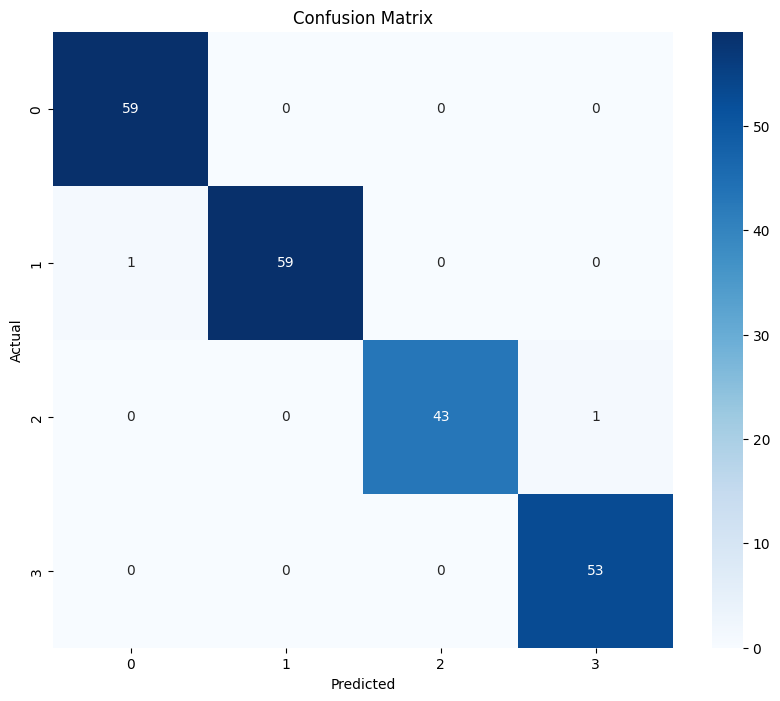

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()
plt.close()

**Results Interpretation**

In [31]:
top_proteins = feature_importance.head(10)
print("Top 10 important proteins:")
print(top_proteins)

Top 10 important proteins:
APP_N           0.051377
pPKCG_N         0.046889
SOD1_N          0.037476
Tau_N           0.034498
AcetylH3K9_N    0.030821
pCAMKII_N       0.027413
ITSN1_N         0.026460
S6_N            0.026223
BRAF_N          0.021428
Ubiquitin_N     0.019904
dtype: float64


In [32]:
# Evaluate Impact of Genotype, Behavior, and Treatment
for factor in ['Genotype', 'Behavior', 'Treatment']:
    print(f"\nSignificant effects of {factor} on protein expression:")
    for protein in numerical_columns:
        f_value, p_value = stats.f_oneway(
            *[group[protein].values for name, group in df.groupby(factor)]
        )
        if p_value < 0.05:
            print(f"{factor} has a significant effect on {protein} (p-value: {p_value:.4f})")


Significant effects of Genotype on protein expression:
Genotype has a significant effect on DYRK1A_N (p-value: 0.0034)
Genotype has a significant effect on ITSN1_N (p-value: 0.0000)
Genotype has a significant effect on NR1_N (p-value: 0.0002)
Genotype has a significant effect on NR2A_N (p-value: 0.0000)
Genotype has a significant effect on pAKT_N (p-value: 0.0024)
Genotype has a significant effect on pCREB_N (p-value: 0.0000)
Genotype has a significant effect on pMEK_N (p-value: 0.0261)
Genotype has a significant effect on pNR1_N (p-value: 0.0000)
Genotype has a significant effect on pNR2A_N (p-value: 0.0000)
Genotype has a significant effect on pNR2B_N (p-value: 0.0000)
Genotype has a significant effect on pRSK_N (p-value: 0.0000)
Genotype has a significant effect on AKT_N (p-value: 0.0065)
Genotype has a significant effect on CAMKII_N (p-value: 0.0456)
Genotype has a significant effect on ELK_N (p-value: 0.0299)
Genotype has a significant effect on ERK_N (p-value: 0.0056)
Genotype h

Treatment has a significant effect on IL1B_N (p-value: 0.0000)
Treatment has a significant effect on P3525_N (p-value: 0.0000)
Treatment has a significant effect on pCASP9_N (p-value: 0.0003)
Treatment has a significant effect on PSD95_N (p-value: 0.0000)
Treatment has a significant effect on SNCA_N (p-value: 0.0215)
Treatment has a significant effect on Ubiquitin_N (p-value: 0.0000)
Treatment has a significant effect on SHH_N (p-value: 0.0241)
Treatment has a significant effect on BCL2_N (p-value: 0.0000)
Treatment has a significant effect on pS6_N (p-value: 0.0000)
Treatment has a significant effect on EGR1_N (p-value: 0.0002)
Treatment has a significant effect on CaNA_N (p-value: 0.0000)


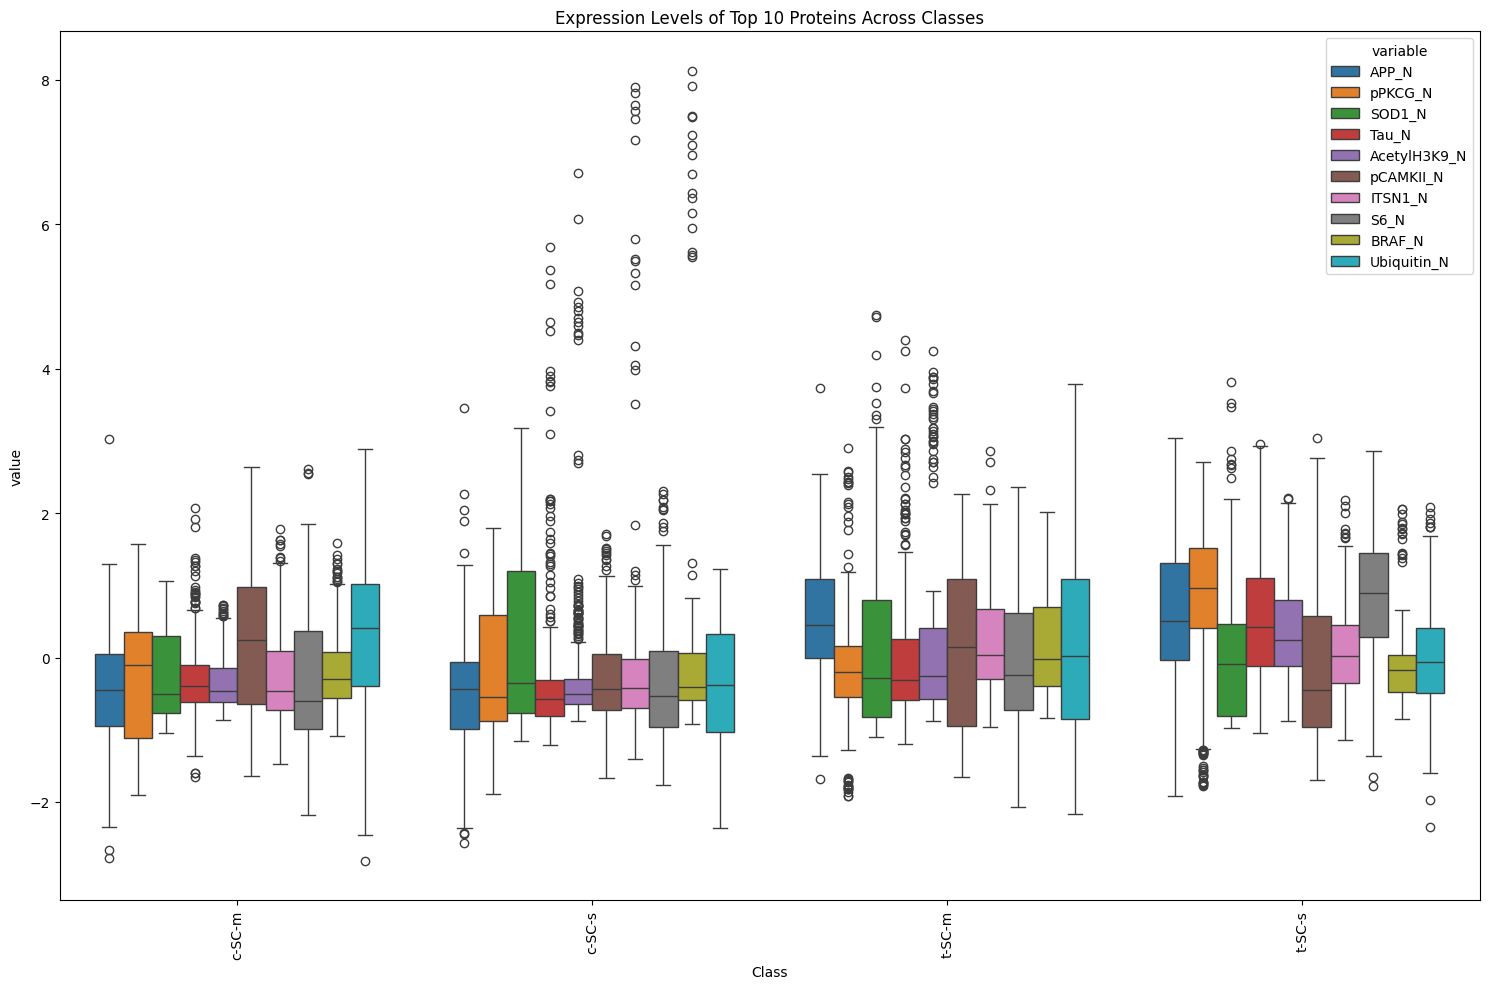

In [33]:
# Visualize top proteins
plt.figure(figsize=(15, 10))
sns.boxplot(x='Class', y='value', hue='variable', 
            data=pd.melt(df[['Class'] + top_proteins.index.tolist()], id_vars=['Class']))
plt.xticks(rotation=90)
plt.title('Expression Levels of Top 10 Proteins Across Classes')
plt.tight_layout()
plt.savefig('top_proteins_boxplot.png')
plt.show()
plt.close()

In [34]:
print("\nAnalysis complete. Check the generated plots for visualizations.")


Analysis complete. Check the generated plots for visualizations.
